이전 챕터까지는 선형 회귀를 좀 더 직접적으로 이해하기 위해 가설, 비용 함수를 직접 정의해서 선형 회귀 모델을 구현했습니다. 이번에는 파이토치에서 이미 구현되어져 제공되고 있는 함수들을 불러오는 것으로 더 쉽게 선형 회귀 모델을 구현해보겠습니다.

예를 들어 파이토치에서는 선형 회귀 모델이 nn.Linear()라는 함수로, 또 평균 제곱오차가 nn.functional.mse_loss()라는 함수로 구현되어져 있습니다. 아래는 이번 실습에서 사용할 두 함수의 사용 예제를 간단히 보여줍니다.

In [2]:
# import torch.nn as nn
# model = nn.Linear(input_dim, output_dim)

In [3]:
# import torch.nn.functional as F
# cost = F.mse_loss(prediction, y_train)

# 1. 단순 선형 회귀 구현하기

---

우선 필요한 도구들을 임포트합니다.

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [5]:
torch.manual_seed(1)

이제 데이터를 선언합니다. 아래 데이터는 $y = 2x$
를 가정된 상태에서 만들어진 데이터로 우리는 이미 정답이 W=2, b=0임을 알고 있는 사태입니다. 모델이 이 두 W와 b의 값을 제대로 찾아내도록 하는 것이 목표입니다.

In [6]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

데이터를 정의하였으니 이제 선형 회귀 모델을 구현할 차례입니다.
nn.Linear()는 입력의 차원, 출력의 차원을 인수로 받습니다.

In [7]:
# 모델을 선언 및 초기화. 단순 선형 회귀이므로 input_dim=1, output_dim=1.
model = nn.Linear(1,1)

위 torch.nn.Linear 인자로 1, 1을 사용하였습니다. 하나의 입력 $x$에 대해서 하나의 출력 $y$을 가지므로, 입력 차원과 출력 차원 모두 1을 인수로 사용하였습니다. model에는 가중치 W와 편향 b가 저장되어져 있습니다. 이 값은 model.parameters()라는 함수를 사용하여 불러올 수 있는데, 한 번 출력해보겠습니다.

In [8]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


2개의 값이 출력되는데 첫번째 값이 W고, 두번째 값이 b에 해당됩니다. 두 값 모두 현재는 랜덤 초기화가 되어져 있습니다. 그리고 두 값 모두 학습의 대상이므로 requires_grad=True가 되어져 있는 것을 볼 수 있습니다.

이제 옵티마이저를 정의합니다. model.parameters()를 사용하여 W와 b를 전달합니다.
학습률(learning rate)은 0.01로 정합니다.

In [9]:
# optimizer 설정. 경사 하강법 SGD를 사용하고 learning rate를 의미하는 lr은 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

In [10]:
# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


학습이 완료되었습니다. Cost의 값이 매우 작습니다. W와 b의 값도 최적화가 되었는지 확인해봅시다.  
$x$에 임의의 값 4를 넣어 모델이 예측하는 $y$의 값을 확인해보겠습니다.

In [11]:
# 임의의 입력 4를 선언
new_var =  torch.FloatTensor([[4.0]]) 
# 입력한 값 4에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) # forward 연산
# y = 2x 이므로 입력이 4라면 y가 8에 가까운 값이 나와야 제대로 학습이 된 것
print("훈련 후 입력이 4일 때의 예측값 :", pred_y) 

훈련 후 입력이 4일 때의 예측값 : tensor([[7.9989]], grad_fn=<AddmmBackward0>)


사실 이 문제의 정답은 $y = 2x$가 정답이므로 y값이 8에 가까우면 W와 b의 값이 어느정도 최적화가 된 것으로 볼 수 있습니다. 실제로 예측된 y값은 7.9989로 8에 매우 가깝습니다.

이제 학습 후의 W와 b의 값을 출력해보겠습니다.

In [12]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.9994]], requires_grad=True), Parameter containing:
tensor([0.0014], requires_grad=True)]


W의 값이 2에 가깝고, b의 값이 0에 가까운 것을 볼 수 있습니다.

+ $H(x)$식에 입력 $x$로부터 예측된 $y$를 얻는 것을 forward 연산이라고 합니다.  
+ 학습 전, prediction = model(x_train)은 x_train으로부터 예측값을 리턴하므로 forward 연산입니다.  
+ 학습 후, pred_y = model(new_var)는 임의의 값 new_var로부터 예측값을 리턴하므로 forward 연산입니다.  
+ 학습 과정에서 비용 함수를 미분하여 기울기를 구하는 것을 backward 연산이라고 합니다.  
+ cost.backward()는 비용 함수로부터 기울기를 구하라는 의미이며 backward 연산입니다.  

# 2. 다중 선형 회귀 구현하기

---

이제 nn.Linear()와 nn.functional.mse_loss()로 다중 선형 회귀를 구현해봅시다. 사실 코드 자체는 달라지는 건 거의 없는데, nn.Linear()의 인자값과 학습률(learning rate)만 조절해주었습니다.

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [15]:
torch.manual_seed(1)

이제 데이터를 선언해줍니다. 여기서는 3개의 $x$로부터 하나의 $y$를 예측하는 문제입니다.  
즉, 가설 수식은 $H(x) = w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{3} + b$입니다.

In [17]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

데이터를 정의하였으니 이제 선형 회귀 모델을 구현할 차례입니다. nn.Linear()는 입력의 차원, 출력의 차원을 인수로 받습니다.

In [18]:
# 모델을 선언 및 초기화. 다중 선형 회귀이므로 input_dim=3, output_dim=1.
model = nn.Linear(3,1)

위 torch.nn.Linear 인자로 3, 1을 사용하였습니다. 3개의 입력 x에 대해서 하나의 출력 y을 가지므로, 입력 차원은 3, 출력 차원은 1을 인수로 사용하였습니다. model에는 3개의 가중치 w와 편향 b가 저장되어져 있습니다. 이 값은 model.parameters()라는 함수를 사용하여 불러올 수 있는데, 한 번 출력해보겠습니다.

In [19]:
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True), Parameter containing:
tensor([0.2710], requires_grad=True)]


첫번째 출력되는 것이 3개의 w고, 두번째 출력되는 것이 b에 해당됩니다. 두 값 모두 현재는 랜덤 초기화가 되어져 있습니다. 그리고 두 출력 결과 모두 학습의 대상이므로 requires_grad=True가 되어져 있는 것을 볼 수 있습니다.

이제 옵티마이저를 정의합니다. model.parameters()를 사용하여 3개의 w와 b를 전달합니다. 학습률(learning rate)은 0.00001로 정합니다. 파이썬 코드로는 1e-5로도 표기합니다. 0.01로 하지 않는 이유는 기울기가 발산하기 때문입니다. 궁금하다면 해보시기 바랍니다.

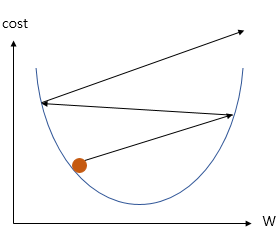

위의 그림은 앞서 배웠던 내용으로, 학습률(learning rate)이 모델의 필요한 크기보다 높을 때, 기울기가 발산하는 현상을 보여줍니다.

In [21]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

이하 코드는 단순 선형 회귀를 구현했을 때와 동일합니다.

In [22]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))


Epoch    0/2000 Cost: 31667.599609
Epoch  100/2000 Cost: 0.225993
Epoch  200/2000 Cost: 0.223911
Epoch  300/2000 Cost: 0.221941
Epoch  400/2000 Cost: 0.220059
Epoch  500/2000 Cost: 0.218271
Epoch  600/2000 Cost: 0.216575
Epoch  700/2000 Cost: 0.214950
Epoch  800/2000 Cost: 0.213413
Epoch  900/2000 Cost: 0.211952
Epoch 1000/2000 Cost: 0.210559
Epoch 1100/2000 Cost: 0.209230
Epoch 1200/2000 Cost: 0.207967
Epoch 1300/2000 Cost: 0.206762
Epoch 1400/2000 Cost: 0.205618
Epoch 1500/2000 Cost: 0.204529
Epoch 1600/2000 Cost: 0.203481
Epoch 1700/2000 Cost: 0.202486
Epoch 1800/2000 Cost: 0.201539
Epoch 1900/2000 Cost: 0.200634
Epoch 2000/2000 Cost: 0.199770


학습이 완료되었습니다. Cost의 값이 매우 작습니다. 3개의 w와 b의 값도 최적화가 되었는지 확인해봅시다.
$x$에 임의의 입력 [73, 80, 75]를 넣어 모델이 예측하는 $y$의 값을 확인해보겠습니다.

In [23]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[151.2306]], grad_fn=<AddmmBackward0>)


사실 3개의 값 73, 80, 75는 훈련 데이터로 사용되었던 값입니다. 당시 y의 값은 152였는데, 현재 예측값이 151이 나온 것으로 보아 어느정도는 3개의 w와 b의 값이 최적화 된것으로 보입니다. 이제 학습 후의 3개의 w와 b의 값을 출력해보겠습니다.

In [24]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.9778, 0.4539, 0.5768]], requires_grad=True), Parameter containing:
tensor([0.2802], requires_grad=True)]
